# Linear Regression w/ Gradient Descent

## Purpose

Learn to make a linear regression model and have it train with gradient descent

## Implementation

First create a sample dataset of x and y using random numbers

Implement gradient descent to train the model

Plot everything

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Generate sample data

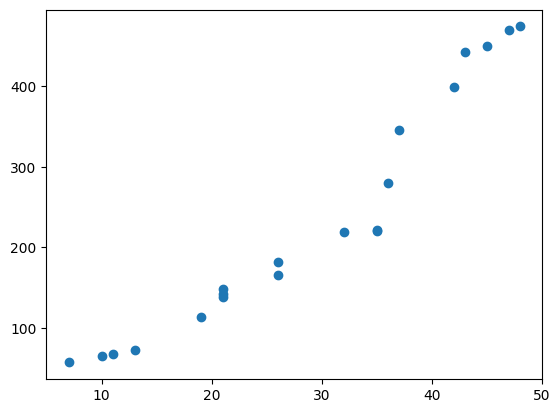

In [2]:
rng = np.random.default_rng()

x_train = np.sort(rng.integers(low=0, high=50, size=20))
y_train = np.sort(rng.integers(low=0, high=500, size=20))

plt.scatter(x_train, y_train)

### Cost function

Setup the cost function and their derivatives for w and b

In [3]:
def cost_function(model, x_vals: np.array, y_vals: np.array) -> float:
    # Note: model is a labmda function of the lin reg model
    m = x_vals.shape[0]
    
    rsf = 0.0
    for i in range(m):
        rsf += (model(x_vals[i]) - y_vals[i]) ** 2
    
    rsf *= (1 / (2 * m))
    
    return rsf


def d_cost_function_w(model, x_vals: np.array, y_vals: np.array) -> float:
    # Note: model is a labmda function of the lin reg model
    m = x_vals.shape[0]
    
    rsf = 0.0
    for i in range(m):
        rsf += (model(x_vals[i]) - y_vals[i]) * x_vals[i]
    
    rsf *= (1 / m)
    
    return rsf


def d_cost_function_b(model, x_vals: np.array, y_vals: np.array) -> float:
    # Note: model is a labmda function of the lin reg model
    m = x_vals.shape[0]
    
    rsf = 0.0
    for i in range(m):
        rsf += (model(x_vals[i]) - y_vals[i])
    
    rsf *= (1 / m)
    
    return rsf


### Gradient Descent Algorithm

In [4]:
def grad_descent(x_vals: np.array, y_vals: np.array, a: float, w: float, b: float, n: int) -> list:
    # Note n is the number of iterations to apply gradient descent

    costs = []

    for i in range(n):
        costs.append(cost_function(lambda x: w * x + b, x_vals, y_vals))

        new_w = w - a * d_cost_function_w(lambda x: w * x + b, x_vals, y_vals)
        new_b = b - a * d_cost_function_b(lambda x: w * x + b, x_vals, y_vals)
    
        w = new_w
        b = new_b


    return [w, b, costs]

### Calling Gradient Descent

Returning the w and b values, and a list of cost values over the training sequence

In [5]:
final_w, final_b, costs = grad_descent(x_train, y_train, 0.001, 0, 0, 100)


### Plotting

First, plot the training data with the linear regression line. Also plot a new test point on that graph (in green)

Second, plot the cost function over time

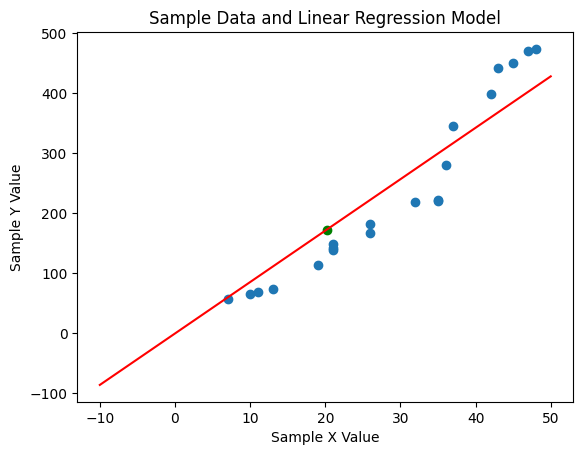

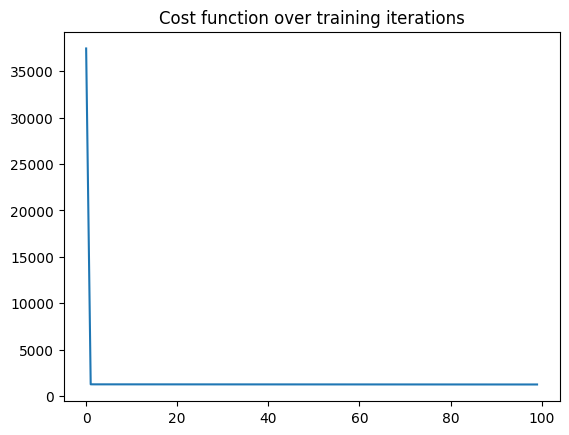

In [6]:
x = np.linspace(-10, 50, 100)
def f(x):
    return final_w * x + final_b


plt.scatter(x_train, y_train)
plt.plot(x, f(x), color="red")
plt.scatter(20.2, f(20.2), color="green")
plt.xlabel("Sample X Value")
plt.ylabel("Sample Y Value")
plt.title("Sample Data and Linear Regression Model")
plt.show()

plt.plot(costs)
plt.title("Cost function over training iterations")
plt.show()